In [ ]:
!nvidia-smi

Mon Aug 21 04:49:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv5

In [ ]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

## Install YOLOv8

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## Install Detectron2

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


## Install Supervision

In [ ]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.2.0


## Download data

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-08-21 05:13:45--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 172.217.194.113, 172.217.194.102, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n9p4r2le6h32ban8dj786iq0rsdaj6fd/1692594825000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=15a3c7c3-d4fa-4ae1-8928-51a95a7836d9 [following]
--2023-08-21 05:13:47--  https://doc-0k-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n9p4r2le6h32ban8dj786iq0rsdaj6fd/1692594825000/04309230031174164349/*/1vVrEVMxucHgqGd7vAa501ASojbeGPhIr?e=download&uuid=15a3c7c3-d4fa-4ae1-8928-51a95a7836d9
Resolving doc-0k-ag-docs.googleusercontent.com (doc-0k-ag-docs.googleusercontent.com)... 74.1

In [ ]:
MARKET_SQUARE_VIDEO_PATH = f"{HOME}/market-square.mp4"

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm" -O mall.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-08-21 05:14:04--  https://docs.google.com/uc?export=download&confirm=&id=1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm
Resolving docs.google.com (docs.google.com)... 172.217.194.113, 172.217.194.102, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6eu4ufph1bgafhdu93r8k67idkfofd7m/1692594825000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=617b3195-3fa3-4b8e-a7dc-8682684ae8e2 [following]
--2023-08-21 05:14:08--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6eu4ufph1bgafhdu93r8k67idkfofd7m/1692594825000/04309230031174164349/*/1M3UuH3QNDWGiH0NmGgHtIgXXGDo_nigm?e=download&uuid=617b3195-3fa3-4b8e-a7dc-8682684ae8e2
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 74.1

In [ ]:
MALL_VIDEO_PATH = f"{HOME}/mall.mp4"

In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz" -O subway.mp4 && rm -rf /tmp/cookies.txt

/content
--2023-08-21 05:14:20--  https://docs.google.com/uc?export=download&confirm=t&id=1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz
Resolving docs.google.com (docs.google.com)... 172.217.194.102, 172.217.194.138, 172.217.194.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rolqf9f4qgmnana4pf89f0lbm811fvg/1692594825000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=145d74d5-0160-4491-a06d-add24f42beee [following]
--2023-08-21 05:14:22--  https://doc-00-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0rolqf9f4qgmnana4pf89f0lbm811fvg/1692594825000/04309230031174164349/*/1qZ6ROKdzHbQiHdizKfYbecr9qquOQ0Cz?e=download&uuid=145d74d5-0160-4491-a06d-add24f42beee
Resolving doc-00-ag-docs.googleusercontent.com (doc-00-ag-docs.googleusercontent.com)... 74.

In [ ]:
SUBWAY_VIDEO_PATH = f"{HOME}/subway.mp4"

## Simple Detectron2 Subway Example

In [ ]:
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f10217.pkl: 178MB [00:01, 175MB/s]                           


**NOTE:** Let's start vanilla YOLOv8 inference pipeline.

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


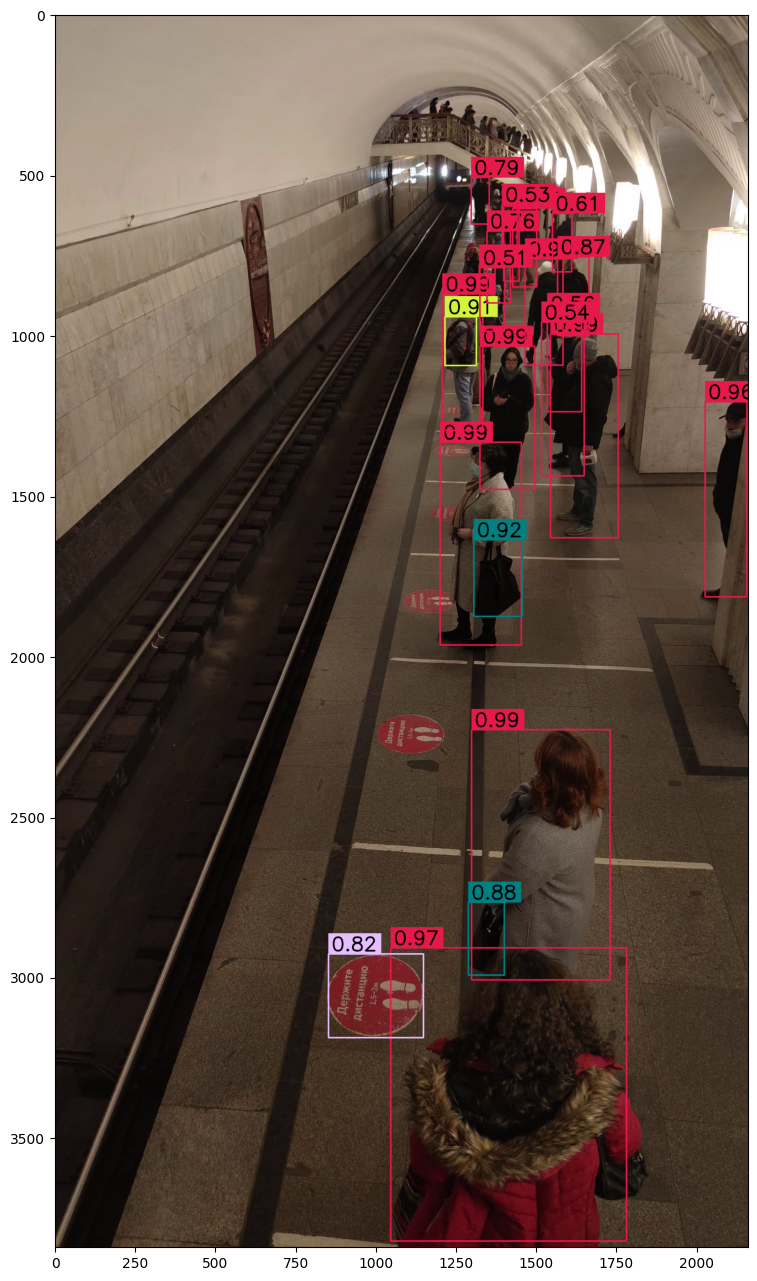

In [ ]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(SUBWAY_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
outputs = predictor(frame)
detections = sv.Detections(
    xyxy=outputs["instances"].pred_boxes.tensor.cpu().numpy(),
    confidence=outputs["instances"].scores.cpu().numpy(),
    class_id=outputs["instances"].pred_classes.cpu().numpy().astype(int)
)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

**NOTE:** Once again, we have a lot of excess detections that we are not interested in. Let us remove all those not belonging to the person class and hide labels for better visibility.

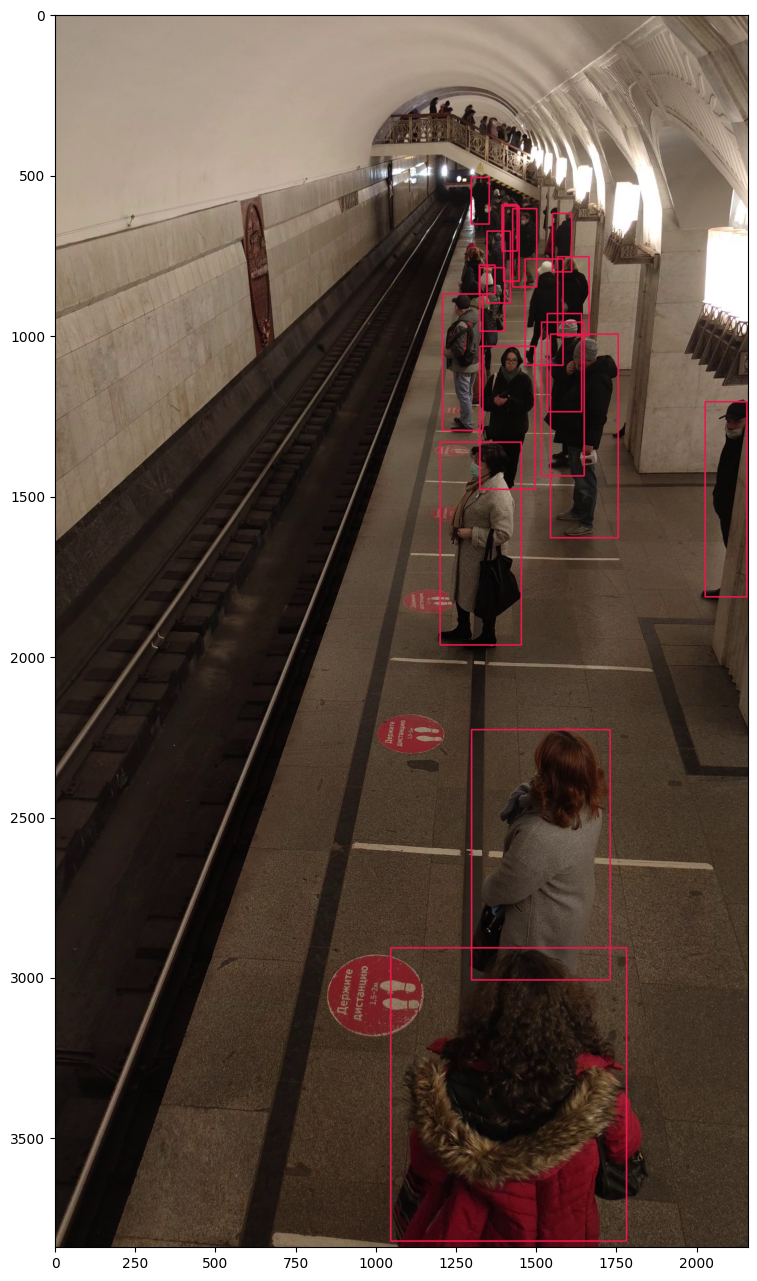

In [ ]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(SUBWAY_VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)

# detect
outputs = predictor(frame)
detections = sv.Detections(
    xyxy=outputs["instances"].pred_boxes.tensor.cpu().numpy(),
    confidence=outputs["instances"].scores.cpu().numpy(),
    class_id=outputs["instances"].pred_classes.cpu().numpy().astype(int)
)
detections = detections[detections.class_id == 0]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections, skip_label=True)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16, 16))

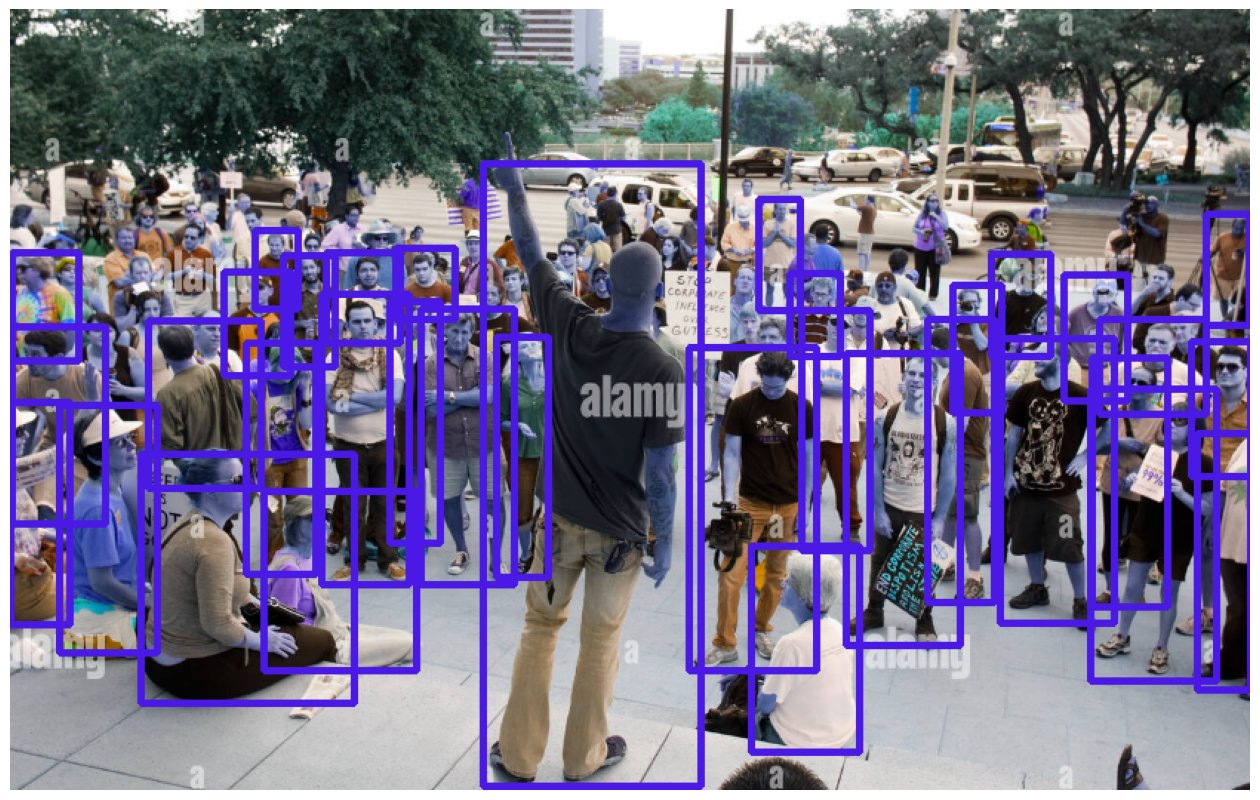

In [ ]:
#temp
import supervision as sv
import cv2

# Load your image
IMAGE_PATH = "/content/mineex.png"
image = cv2.imread(IMAGE_PATH)  # Load the image using OpenCV

# Create a dummy video frames generator with a single frame
def image_generator():
    yield image

# Create an iterator for the image generator
iterator = iter(image_generator())
frame = next(iterator)

# Detect
outputs = predictor(frame)  # Assuming predictor is already defined
detections = sv.Detections(
    xyxy=outputs["instances"].pred_boxes.tensor.cpu().numpy(),
    confidence=outputs["instances"].scores.cpu().numpy(),
    class_id=outputs["instances"].pred_classes.cpu().numpy().astype(int)
)
detections = detections[detections.class_id == 0]

# Annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
annotated_image = box_annotator.annotate(scene=frame, detections=detections, skip_label=True)

# Display the annotated image
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


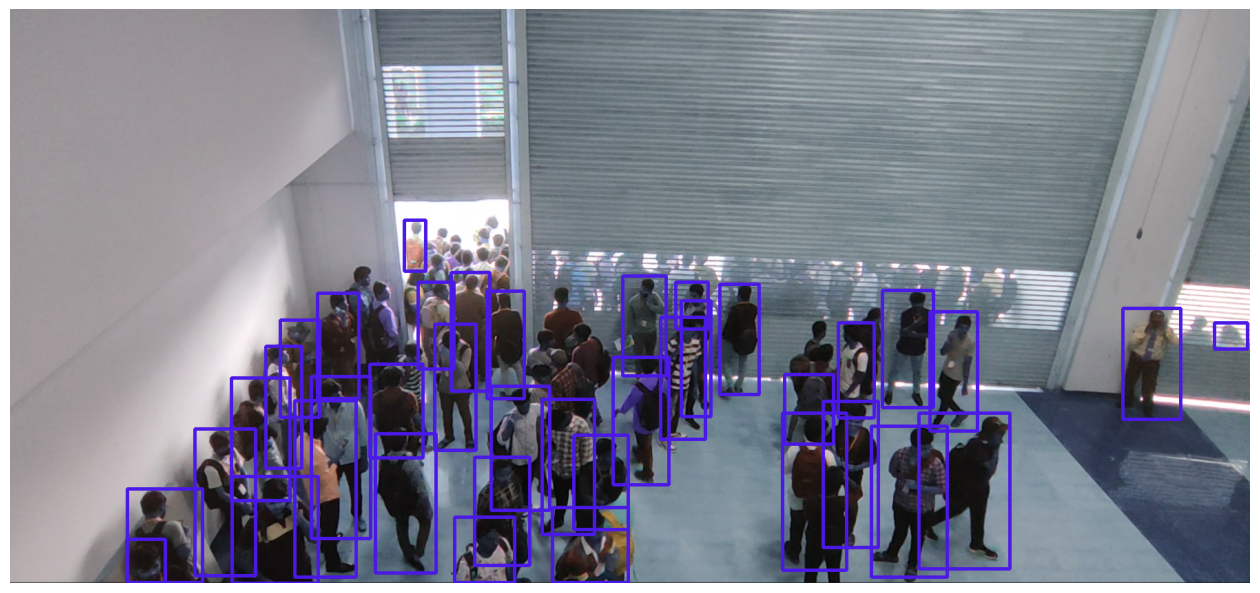

In [ ]:
#temp
import supervision as sv
import cv2

# Load your image
IMAGE_PATH = "/content/hall.png"
image = cv2.imread(IMAGE_PATH)  # Load the image using OpenCV

# Create a dummy video frames generator with a single frame
def image_generator():
    yield image

# Create an iterator for the image generator
iterator = iter(image_generator())
frame = next(iterator)

# Detect
outputs = predictor(frame)  # Assuming predictor is already defined
detections = sv.Detections(
    xyxy=outputs["instances"].pred_boxes.tensor.cpu().numpy(),
    confidence=outputs["instances"].scores.cpu().numpy(),
    class_id=outputs["instances"].pred_classes.cpu().numpy().astype(int)
)
detections = detections[detections.class_id == 0]

# Annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
annotated_image = box_annotator.annotate(scene=frame, detections=detections, skip_label=True)

# Display the annotated image
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
